### Feature engineering
##### Create time-related features
##### Data set: Capital bike share

# Examine whether the bicycle count shows any time-related patterns

In [154]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib as plt

In [155]:
# Import data and get an overview

df_bikes = pd.read_csv('../data/train_bikes.csv')
df_bikes.describe()
df_bikes.info()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [157]:
df_bikes.drop(columns=['casual','registered'], inplace=True)
df_bikes

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,129


In [159]:
# Use datetime module

my_str = '2011-01-01 00:00:00'
my_dt = datetime.strptime(my_str, '%Y-%m-%d %H:%M:%S')
df_bikes['datetime'] = pd.to_datetime(df_bikes['datetime'])
df_bikes.index = df_bikes['datetime']

In [161]:
df_bikes.index

DatetimeIndex(['2011-01-01 00:00:00', '2011-01-01 01:00:00',
               '2011-01-01 02:00:00', '2011-01-01 03:00:00',
               '2011-01-01 04:00:00', '2011-01-01 05:00:00',
               '2011-01-01 06:00:00', '2011-01-01 07:00:00',
               '2011-01-01 08:00:00', '2011-01-01 09:00:00',
               ...
               '2012-12-19 14:00:00', '2012-12-19 15:00:00',
               '2012-12-19 16:00:00', '2012-12-19 17:00:00',
               '2012-12-19 18:00:00', '2012-12-19 19:00:00',
               '2012-12-19 20:00:00', '2012-12-19 21:00:00',
               '2012-12-19 22:00:00', '2012-12-19 23:00:00'],
              dtype='datetime64[ns]', name='datetime', length=10886, freq=None)

In [162]:
# Import the data and parse the datetime directly

df_bikes = pd.read_csv('../data/train_bikes.csv', index_col=0, parse_dates=True)
df_bikes

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168


In [163]:
# Extract features from the datetime index

df_bikes['day'] = df_bikes.index.day
df_bikes['day']

datetime
2011-01-01 00:00:00     1
2011-01-01 01:00:00     1
2011-01-01 02:00:00     1
2011-01-01 03:00:00     1
2011-01-01 04:00:00     1
                       ..
2012-12-19 19:00:00    19
2012-12-19 20:00:00    19
2012-12-19 21:00:00    19
2012-12-19 22:00:00    19
2012-12-19 23:00:00    19
Name: day, Length: 10886, dtype: int64

In [164]:
df_bikes['hour'] = df_bikes.index.hour
df_bikes['hour']

datetime
2011-01-01 00:00:00     0
2011-01-01 01:00:00     1
2011-01-01 02:00:00     2
2011-01-01 03:00:00     3
2011-01-01 04:00:00     4
                       ..
2012-12-19 19:00:00    19
2012-12-19 20:00:00    20
2012-12-19 21:00:00    21
2012-12-19 22:00:00    22
2012-12-19 23:00:00    23
Name: hour, Length: 10886, dtype: int64

In [165]:
# Extract information from the datetime column

df_bikes['datetime'] = df_bikes.index
df_bikes['year'] = df_bikes['datetime'].dt.year
df_bikes['year']

datetime
2011-01-01 00:00:00    2011
2011-01-01 01:00:00    2011
2011-01-01 02:00:00    2011
2011-01-01 03:00:00    2011
2011-01-01 04:00:00    2011
                       ... 
2012-12-19 19:00:00    2012
2012-12-19 20:00:00    2012
2012-12-19 21:00:00    2012
2012-12-19 22:00:00    2012
2012-12-19 23:00:00    2012
Name: year, Length: 10886, dtype: int64

/var/folders/_h/kcrz3l9s1nx7y978p_vyp9340000gn/T/ipykernel_60811/811922885.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  df_bikes['2011-01-03'].plot(y='count')


<AxesSubplot:xlabel='datetime'>

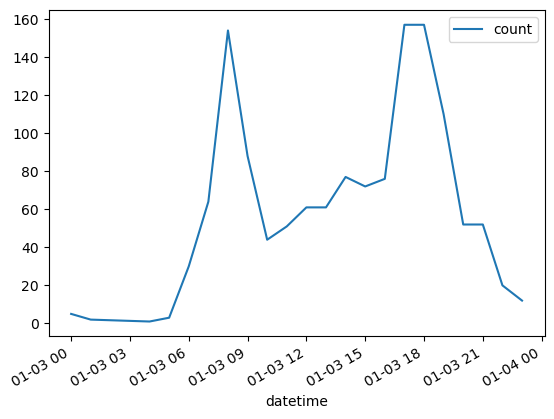

In [166]:
# Plot small sections of the data (1 day, 1 week etc.) to find patterns

df_bikes['2011-01-03'].plot(y='count')


<AxesSubplot:xlabel='datetime'>

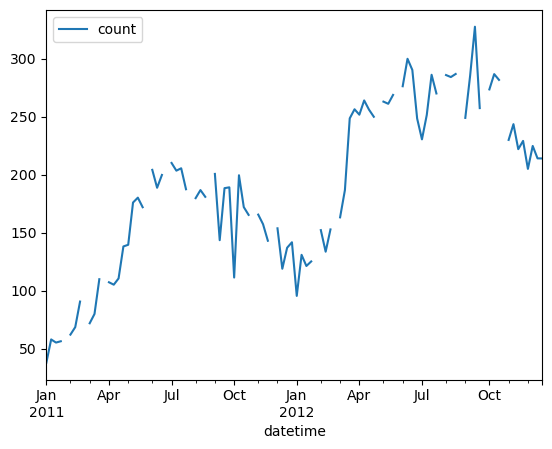

In [167]:
df_bikes.resample('W').mean().plot(y='count')

In [168]:
# Group by a time feature and observe grouped means

df_bikes.groupby([pd.Grouper(freq='M')]).sum()
df_bikes.groupby([pd.Grouper(freq='W')]).mean()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day,hour,year
datetime,,,,,,,,,,,,,,
2011-01-31,431,24,264,621,3721.16,4641.000,24269,5926.1768,2008,21544,23552,4235,5135,866741
2011-02-28,446,0,327,615,5053.66,6243.965,23897,6917.1470,3776,29068,32844,4467,5208,896906
2011-03-31,446,0,328,654,6272.18,7535.435,24942,7151.1043,7910,30825,38735,4440,5211,896906
2011-04-30,910,24,287,737,8088.48,9664.125,30160,7209.1263,12229,38288,50517,4549,5241,915005
2011-05-31,912,0,336,697,9817.04,11607.545,32568,5634.0434,15865,63848,79713,4560,5244,917016
2011-06-30,912,0,312,583,12855.14,14660.815,26581,5440.1253,19600,70176,89776,4560,5244,917016
2011-07-31,1368,24,288,540,13665.30,15509.315,27544,5454.1216,26145,66703,92848,4560,5244,917016
2011-08-31,1368,0,360,613,13528.36,15258.540,28348,5691.1274,17580,65716,83296,4560,5244,917016
2011-09-30,1359,24,285,733,11388.98,12998.045,33898,5210.1545,18311,60793,79104,4534,5238,910983
